### Student Information
Name: **Daniel Kong (江洵)**

Student ID: **110062425**

GitHub ID: **drainvers**

Kaggle name: **Daniel Kong (drainvers)**

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

# Take Home Exercises
## 1. Data Preparation
### 1.1 Load Data

In [1]:
### Begin Assignment Here
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [2]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

In [3]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

### >>> Exercise 1 (Take Home)

**Answer:**

We first create a `CountVectorizer` to generate a document matrix (of word counts) for the train and test datasets. Stop words are removed.

In [4]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

train_df_vect = CountVectorizer(stop_words='english')
train_df_counts = train_df_vect.fit_transform(train_df.text)
train_df_freq = np.asarray(train_df_counts.sum(axis=0))[0]

test_df_vect = CountVectorizer(stop_words='english')
test_df_counts = test_df_vect.fit_transform(test_df.text)
test_df_freq = np.asarray(test_df_counts.sum(axis=0))[0]

Then we use `argsort` to get the indices after sorting (which can be applied to the feature names for the purposes of this exercise). Use the index slicing operator for a descending sort.

In [5]:
sorted_train_df_indices = np.argsort(train_df_freq)[::-1]
sorted_train_df_freq = np.array(train_df_freq)[sorted_train_df_indices]
sorted_train_df_feat = np.array(train_df_vect.get_feature_names_out())[sorted_train_df_indices]

sorted_test_df_indices = np.argsort(test_df_freq)[::-1]
sorted_test_df_freq = np.array(test_df_freq)[sorted_test_df_indices]
sorted_test_df_feat = np.array(test_df_vect.get_feature_names_out())[sorted_test_df_indices]

Finally, use Seaborn to plot the top 30 words.

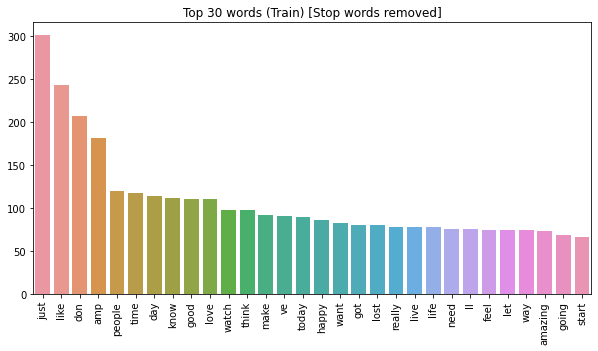

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize=(10, 5))
g = sns.barplot(x=sorted_train_df_feat[:30], 
                y=sorted_train_df_freq[:30])
g.set_title('Top 30 words (Train) [Stop words removed]')
g.set_xticklabels(sorted_train_df_feat[:30], rotation = 90);

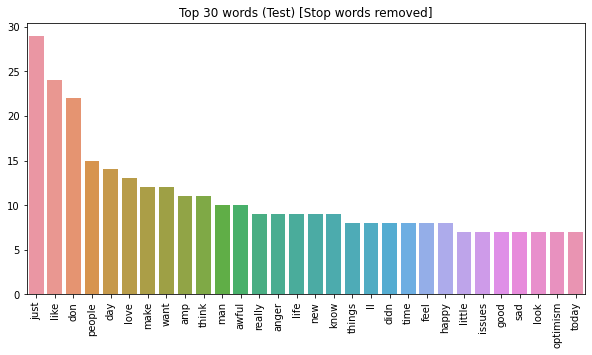

In [7]:
plt.subplots(figsize=(10, 5))
g = sns.barplot(x=sorted_test_df_feat[:30], 
                y=sorted_test_df_freq[:30])
g.set_title('Top 30 words (Test) [Stop words removed]')
g.set_xticklabels(sorted_test_df_feat[:30], rotation = 90);

## 2. Feature Engineering
### Using Bag of Words

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\Daniel\anaconda3\envs\dm2021_py38\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

---
### >>> Exercise 2 (Take home):
Generate an embedding using the TF-IDF vectorizer instead of the BOW one with 1000 features and show the feature names for features [100:110].

**Answer:**

First create a `TfidfVectorizer` with `max_features` set to 1000

In [10]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# build analyzers (bag-of-words)
TFIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
TFIDF_1000.fit(train_df['text'])

train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])

# check feature names
feature_names_1000 = TFIDF_1000.get_feature_names()
feature_names_1000[100:110]

C:\Users\Daniel\anaconda3\envs\dm2021_py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday', 'be']

---
## 3. Model
### 3.1 Decision Trees

In [11]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [12]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'anger', 'fear', 'joy', 'fear', 'fear', 'sadness',
       'anger', 'fear', 'anger'], dtype=object)

---
## 4. Results Evaluation

In [13]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [14]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.69      0.67        84
        fear       0.65      0.67      0.66       110
         joy       0.68      0.66      0.67        79
     sadness       0.66      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.65      0.66       347
weighted avg       0.66      0.66      0.66       347



In [15]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[58 16  6  4]
 [14 74 10 12]
 [ 9 11 52  7]
 [ 9 13  8 44]]


In [16]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

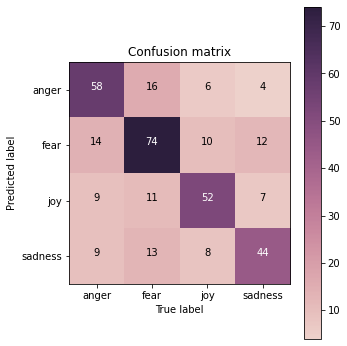

In [17]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### >>> Exercise 3 (Take home):
Can you interpret the results above? What do they mean?

**Answer:**

The confusion matrix indicates the proportion of class labels that were correctly identified (True label and Predicted label are the same) compared to the proportion of class labels that were misclassified (True label and Predicted label are different). Based on the chart above, the confusion matrix indicates that the model does a pretty good job of properly classifying the data, with a larger proportion of correctly classified data points as opposed to misclassified data points.

---
### >>> Exercise 4 (Take home):
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

**Answer:**

First import `MultinomialNB`, then fit it to the data.

In [18]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

MNB_model = MultinomialNB()
MNB_model = MNB_model.fit(X_train, y_train)

In [19]:
MNB_y_train_pred = MNB_model.predict(X_train)
MNB_y_test_pred = MNB_model.predict(X_test)

Let's evaluate the MultinomialNB model.

In [20]:
MNB_acc_train = accuracy_score(y_true=y_train, y_pred=MNB_y_train_pred)
MNB_acc_test = accuracy_score(y_true=y_test, y_pred=MNB_y_test_pred)

print('training accuracy: {}'.format(round(MNB_acc_train, 2)))
print('testing accuracy: {}'.format(round(MNB_acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


              precision    recall  f1-score   support

       anger       0.64      0.67      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.77      0.70      0.73        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



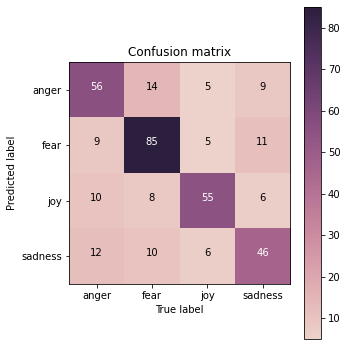

In [21]:
print(classification_report(y_true=y_test, y_pred=MNB_y_test_pred))

MNB_cm = confusion_matrix(y_true=y_test, y_pred=MNB_y_test_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(MNB_cm, classes=my_tags, title='Confusion matrix')

---
### >>> Exercise 5 (Take home):

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

**Answer:**

The Decision Tree model has a significantly higher training accuracy than the Naive Bayes model. However, the Naive Bayes model noticeably did slightly better with unseen data than the Decision Tree, suggesting that Decision Trees are more prone to overfitting. One interesting aspect about the results of the Naive Bayes model is that the model is better able to discern fear and joy-related words as opposed to anger and sadness, while Decision Trees perform well equally among all categories. A possible reason for this is because the distribution of the fear and joy-related data points are hard to split using a decision tree.

---
## 6. Deep Learning

### 6.1 Prepare data (X, y)

In [22]:
from tensorflow import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

In [23]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 45      anger
954      fear
1295     fear
2601      joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [24]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [25]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                

### 6.4 Train

In [26]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 1s 7ms/step - loss: 1.3204 - accuracy: 0.3684 - val_loss: 1.2840 - val_accuracy: 0.4063
Epoch 2/25
113/113 [==============================] - 1s 5ms/step - loss: 0.9711 - accuracy: 0.6601 - val_loss: 0.9264 - val_accuracy: 0.6369
Epoch 3/25
113/113 [==============================] - 1s 7ms/step - loss: 0.5848 - accuracy: 0.7899 - val_loss: 0.8262 - val_accuracy: 0.6542
Epoch 4/25
113/113 [==============================] - 1s 5ms/step - loss: 0.4248 - accuracy: 0.8386 - val_loss: 0.7975 - val_accuracy: 0.6772
Epoch 5/25
113/113 [==============================] - 1s 5ms/step - loss: 0.3436 - accuracy: 0.8760 - val_loss: 0.8271 - val_accuracy: 0.6772
Epoch 6/25
113/113 [==============================] - 1s 6ms/step - loss: 0.2939 - accuracy: 0.8937 - val_loss: 0.8650 - val_accuracy: 0.6859
Epoch 7/25
113/113 [==============================] - 1s 5ms/step - loss: 0.2456 - accuracy: 0.9120 - val_loss: 0.8942 - val_accuracy: 0.6916
Epoch 

### 6.5 Predict on testing data

In [27]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[5.9180884e-03, 9.5252890e-06, 5.7899266e-01, 4.1507977e-01],
       [9.9998438e-01, 3.8675139e-06, 1.8183836e-07, 1.1629212e-05],
       [3.8092129e-08, 9.9999952e-01, 4.8843315e-11, 4.3143936e-07],
       [4.4065714e-03, 4.2066626e-05, 9.9553996e-01, 1.1370630e-05],
       [2.8622344e-01, 1.9886218e-01, 5.1139468e-01, 3.5196710e-03]],
      dtype=float32)

In [28]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'anger', 'fear', 'joy', 'joy'], dtype=object)

In [29]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [30]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.368392,1.320450,0.406340,1.283962
1,1,0.660116,0.971136,0.636888,0.926437
2,2,0.789925,0.584829,0.654179,0.826212
3,3,0.838638,0.424764,0.677233,0.797470
4,4,0.876003,0.343632,0.677233,0.827107
5,5,0.893717,0.293869,0.685879,0.864999
6,6,0.911985,0.245598,0.691643,0.894156
7,7,0.933020,0.203400,0.685879,0.971998
8,8,0.943814,0.173869,0.674352,1.036928
9,9,0.952394,0.153762,0.682997,1.081998


---
### >>> Exercise 6 (Take home): 

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

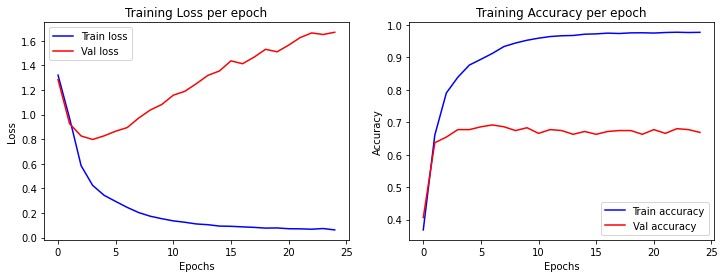

In [31]:
# Answer here
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Loss curve
ax1.plot(training_log['epoch'], training_log['loss'], 'b', label='Train loss')
ax1.plot(training_log['epoch'], training_log['val_loss'], 'r', label='Val loss')
ax1.set_title('Training Loss per epoch')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Accuracy curve
ax2.plot(training_log['epoch'], training_log['accuracy'], 'b', label='Train accuracy')
ax2.plot(training_log['epoch'], training_log['val_accuracy'], 'r', label='Val accuracy')
ax2.set_title('Training Accuracy per epoch')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

**Answer:**

As we can see from the chart, despite the training loss going down consistently throughout epochs, the validation loss actually increased after the third epoch. Looking at the training accuracy graph, validation accuracy stagnated after just the first epoch, while training accuracy converged on 100%. This is a sign of overfitting as the model performs well on the training dataset, but performs poorly on the validation dataset. In the case of underfitting, the model would perform poorly in both training and validation (loss would stay high and not consistently go down over time, accuracy would not consistently go up over time).

---
## 7. Word2Vector

### 7.1 Prepare training corpus

In [32]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
45,10045,i feel furious,"[i, feel, furious]"
954,20097,in my dream....They were trying to steal my ki...,"[in, my, dream, ...., They, were, trying, to, ..."
1295,20438,PM #SheikhHasina in @UN speech terms #terroris...,"[PM, #, SheikhHasina, in, @, UN, speech, terms..."
2601,30597,•Days!'\nHe was itching for a fight..itching f...,"[•Days, !, '\nHe, was, itching, for, a, fight,..."
2422,30418,felt a bit shit getting a very high blood suga...,"[felt, a, bit, shit, getting, a, very, high, b..."


In [33]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['i', 'feel', 'furious']),
       list(['in', 'my', 'dream', '....', 'They', 'were', 'trying', 'to', 'steal', 'my', 'kidney', '!', '!', '!', '#', 'nightmare', '#', 'blackmarket', '#', 'whydidiwatchthat']),
       list(['PM', '#', 'SheikhHasina', 'in', '@', 'UN', 'speech', 'terms', '#', 'terrorism', 'as', 'global', 'challenge', 'and', 'urges', 'world', 'leaders', 'to', 'work', 'together', 'to', 'unroot', 'it', 'from', 'everywhere', '.'])],
      dtype=object)

### 7.2 Training our model

In [34]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
45,10045,i feel furious,"[i, feel, furious]"
954,20097,in my dream....They were trying to steal my ki...,"[in, my, dream, ...., They, were, trying, to, ..."
1295,20438,PM #SheikhHasina in @UN speech terms #terroris...,"[PM, #, SheikhHasina, in, @, UN, speech, terms..."
2601,30597,•Days!'\nHe was itching for a fight..itching f...,"[•Days, !, '\nHe, was, itching, for, a, fight,..."
2422,30418,felt a bit shit getting a very high blood suga...,"[felt, a, bit, shit, getting, a, very, high, b..."


In [35]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_iter)

### 7.3 Generating word vector (embeddings)

In [36]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.05481375,  0.5156467 , -0.02574136, -0.05163031, -0.33578593,
       -0.9974021 ,  0.8199018 ,  1.0510125 , -0.65944153, -0.42365634,
       -0.39244306, -0.6026922 , -0.1286883 ,  0.6354232 , -0.10917153,
       -0.617645  ,  0.47425735, -0.8109106 ,  0.37480894, -1.0095359 ,
        1.164061  ,  0.70169914,  0.64540523, -0.03647354,  0.56036705,
        0.07088464, -0.74646914,  0.64579445, -0.5266264 ,  0.32764766,
        0.5345495 , -0.04650309,  0.4590443 , -0.46429843, -0.08794384,
        0.57738495,  0.3617793 , -0.1405991 , -0.48800987, -0.76633745,
       -0.15676711, -0.36906192, -0.2922744 ,  0.3774075 ,  0.5148424 ,
       -0.3438164 , -0.95534027,  0.52557826,  0.6214485 ,  0.5967663 ,
       -0.03173593, -0.677784  ,  0.1057253 , -0.04899504, -0.67122877,
       -0.01635703,  0.27338254,  0.13532291,  0.35102186,  0.02829715,
        0.38152397, -0.296166  ,  0.35432693,  0.28420666, -0.5431707 ,
        1.0768324 ,  0.38659868,  0.68425745, -1.1699423 ,  0.80

In [37]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('birthday', 0.9327335953712463),
 ('bday', 0.9278163909912109),
 ('smile', 0.9129542112350464),
 ('Be', 0.9106119871139526),
 ('right', 0.9084751605987549),
 ('help', 0.9077585935592651),
 ('blessed', 0.9047913551330566),
 ('dad', 0.9012547135353088),
 ('keeping', 0.892141580581665),
 ('angry', 0.890597939491272)]

### 7.4 Using a pre-trained w2v model

In [38]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

### >>> Exercise 7 (Take home): 

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


**Answer:**

One way to get a representation of a sentence from word vectors would be to multiply each word vector with its TF-IDF score, and get an average of all the results to represent a sentence vector.

In [39]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [40]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


In [41]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [42]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

## 9. High-dimension Visualization: t-SNE

### 9.1 Prepare visualizing target

In [43]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.1 Plot using t-SNE (2-dimension)

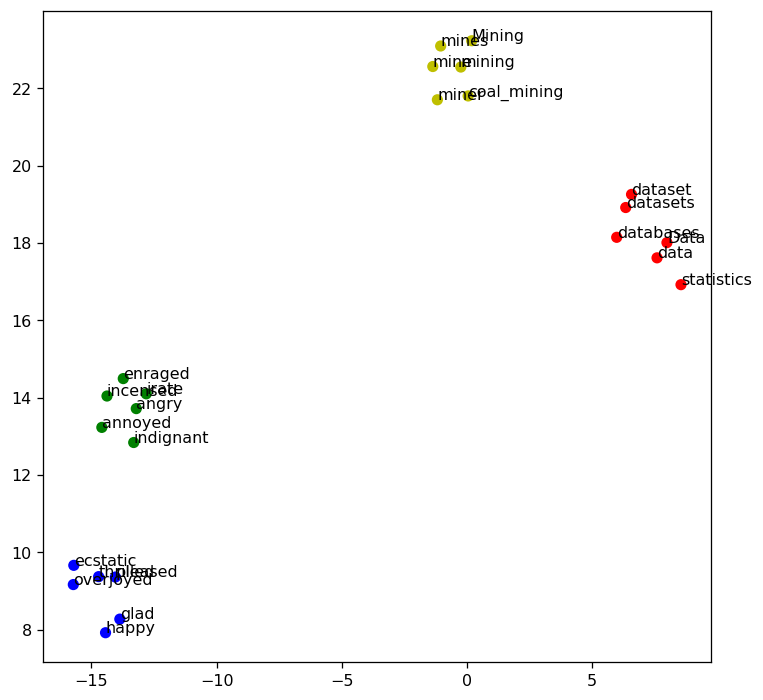

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

**Answer:**

First, prepare the word lists like in the example

In [45]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = [word_list[0]] + [word_ for word_, sim_ in w2v_google_model.most_similar(word_list[0], topn=topn)]
happy_words = [word_list[1]] + [word_ for word_, sim_ in w2v_google_model.most_similar(word_list[1], topn=topn)]        
sad_words   = [word_list[2]] + [word_ for word_, sim_ in w2v_google_model.most_similar(word_list[2], topn=topn)]        
fear_words  = [word_list[3]] + [word_ for word_, sim_ in w2v_google_model.most_similar(word_list[3], topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: '  , sad_words)
print('fear_words: ' , fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'e

Then, prepare the t-SNE model and fit to the new target words.

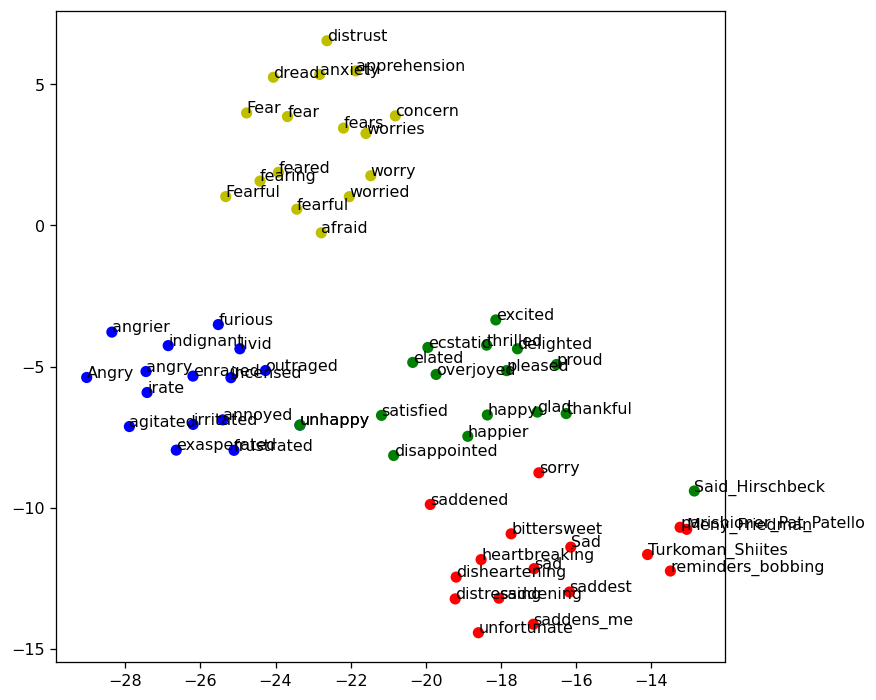

In [46]:
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.key_to_index.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
# Kaggle Report
\[WIP\]